# Import Library

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Dataset

In [87]:
df = pd.read_csv('USA_HOUSING.csv')
df.head()


,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,longitude,latitude
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",-114.31,34.19
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",-114.47,34.40
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",-114.56,33.69
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,-114.57,33.64
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,-114.57,33.57


*   Penjelasan Setiap Kolom
 
 1. Area Income = Rata - rata pendapatan penduduk dikota yang sama dengan rumah tersebut
 2. House Age = Usia rumah tersebut
 3. Number of Rooms = Jumlah Kamar dikota yang sama
 4. Number of Bedrooms = Jumlah Kamar tidur dikota yang sama
 5. Area Population	 = Populasi kota tempat rumah tersebut
 6. price = Harga dari rumah (US$)
 7. Address = Alamat rumah (longitude dan latitude)


# Handling Missing Value

In [88]:
# Melihat jumlah baris pada dataset

df.shape

(5000, 9)

In [89]:
# Melihat nilai kosong pada dataset

df.isnull().sum()

Area Income           0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
longitude             0
latitude              0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Income         5000 non-null   float64
 1   House Age           5000 non-null   float64
 2   Number of Rooms     5000 non-null   float64
 3   Number of Bedrooms  5000 non-null   float64
 4   Area Population     5000 non-null   float64
 5   Price               5000 non-null   float64
 6   Address             5000 non-null   object 
 7   longitude           5000 non-null   float64
 8   latitude            5000 non-null   float64
dtypes: float64(8), object(1)
memory usage: 351.7+ KB


**Dataset tidak memiliki nilai kosong**



# Statistik Data

In [91]:
# melihat statistik data

df.describe()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,longitude,latitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,-117.482700,33.631748
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,0.552238,0.555978
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,-118.110000,32.540000
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,-117.930000,33.150000
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,-117.625000,33.790000
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,-117.140000,34.040000
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,-114.310000,36.640000


In [92]:
# Merubah tipe data kolom Rooms, Bedrooms, population dari float menjadi int

df["Number of Rooms"] = df["Number of Rooms"].astype("int") 
df["Number of Bedrooms"] = df["Number of Bedrooms"].astype("int") 
df["Area Population"] = df["Area Population"].astype("int") 


In [93]:
# Hasil update dataset

df.describe()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,longitude,latitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000.000000
mean,68583.108984,5.977222,6.492200,3.732400,36163.01500,1.232073e+06,-117.482700,33.631748
std,10657.991214,0.991456,1.048503,1.225843,9925.64664,3.531176e+05,0.552238,0.555978
min,17796.631190,2.644304,3.000000,2.000000,172.00000,1.593866e+04,-118.110000,32.540000
25%,61480.562388,5.322283,6.000000,3.000000,29403.75000,9.975771e+05,-117.930000,33.150000
50%,68804.286404,5.970429,7.000000,4.000000,36199.00000,1.232669e+06,-117.625000,33.790000
75%,75783.338666,6.650808,7.000000,4.000000,42861.00000,1.471210e+06,-117.140000,34.040000
max,107701.748378,9.519088,10.000000,6.000000,69621.00000,2.469066e+06,-114.310000,36.640000


# Exploratory Data Analysis (EDA)

In [94]:
df.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price', 'Address', 'longitude', 'latitude'],
      dtype='object')

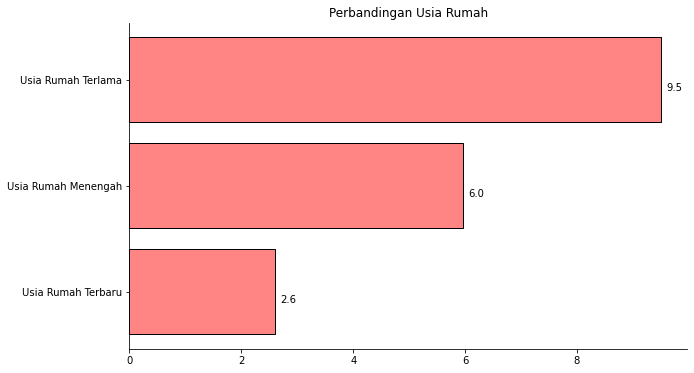

<Figure size 432x288 with 0 Axes>

In [95]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
ax = fig.add_subplot(111)
plt.title('Perbandingan Usia Rumah')

counts = [2.6,5.97,9.5]

y_ax = ("Usia Rumah Terbaru","Usia Rumah Menengah","Usia Rumah Terlama")
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center", color = "#ff8585",edgecolor='black')
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 10)

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+.09, i.get_y()+.3, str(round((i.get_width()), 1)), fontsize=10)

sns.despine()
plt.show();

plt.savefig('age_rentang.jpg', dpi=75)

## Korelasi Variabel

<AxesSubplot:title={'center':'Correlation Matrix'}>

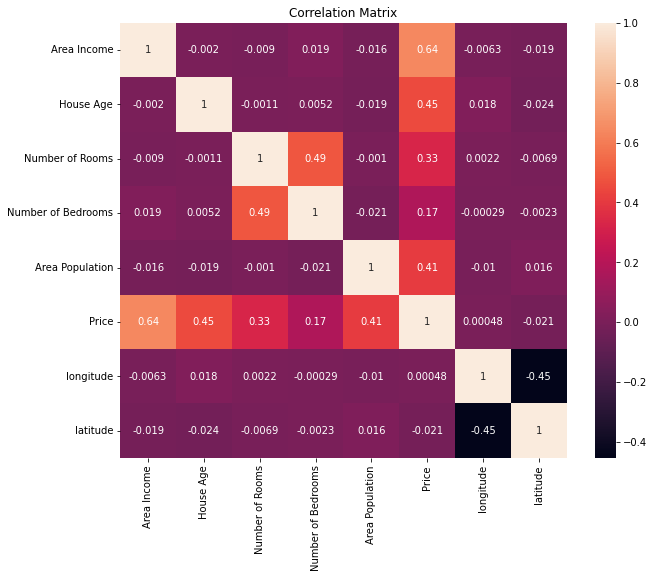

In [96]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

In [97]:
df.corr()["Price"].sort_values(ascending=False)

Price                 1.000000
Area Income           0.639734
House Age             0.452543
Area Population       0.408556
Number of Rooms       0.325114
Number of Bedrooms    0.172429
longitude             0.000484
latitude             -0.020564
Name: Price, dtype: float64

**Kesimpulan**


*   Variabel Area Income memiliki korelasi yang paling tinggi diantara variabel yang lain
*  Variabel Address tidak mempengaruhi karena berupa teks



## Sebaran Data Variabel Price

<AxesSubplot:xlabel='House Age', ylabel='Density'>

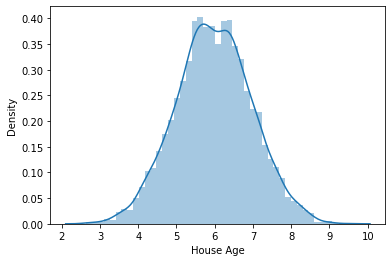

In [98]:
# Melihat sebaran data price

sns.distplot(df['House Age'])

**Kesimpulan**

*   Sebaran data House Age terdistribusi normal.



## Melihat Distribusi Data Tiap Variabel Yang Digunakan

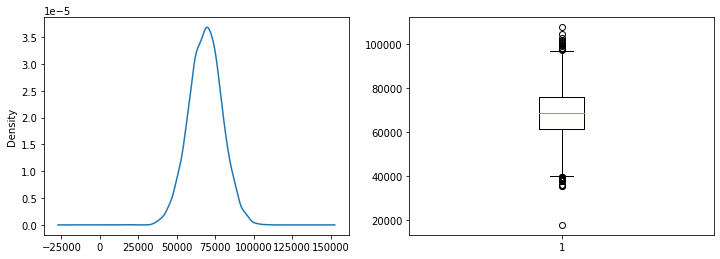

In [99]:
# Melihat distribusi dari Area Income

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Area Income'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Area Income'])
plt.show()

**Kesimpulan**

* Sebagian besar pendapatan berada diangka 75000
* Data memiliki sedikit outliers

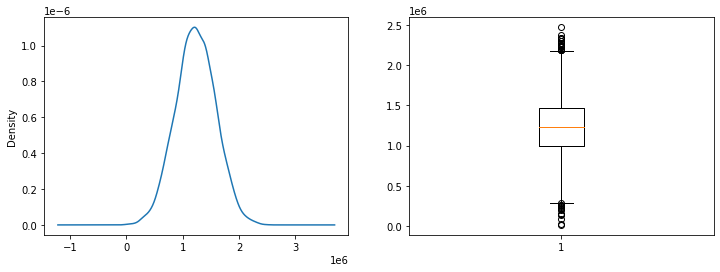

In [100]:
# Melihat distribusi dari Price

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Price'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Price'])
plt.show()

**Kesimpulan**

* sebagian besar harga rumah adalah 1250000 US$
* Data memiliki sedikit outliers

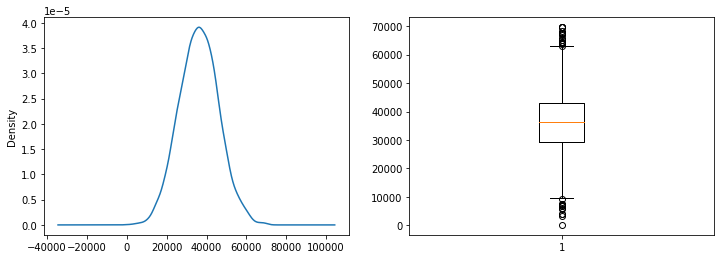

In [101]:
# Melihat distribusi dari Area Population
# Data berupa continous/numerik, maka digunakan histogram garis

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Area Population'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Area Population'])
plt.show()

**Kesimpulan**

* Sebagian besar populasi berada pada nilai 35000
* Data memiliki sedikit outliers.

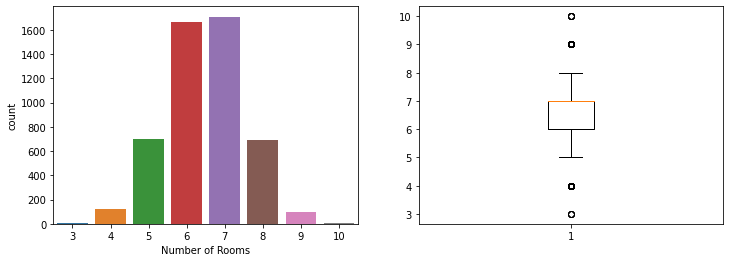

In [102]:
# Melihat distribusi dari Number of Rooms

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Number of Rooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['Number of Rooms'])
plt.show()

**Kesimpulan**

* Sebagian besar rumah memiliki jumlah kamar 6 dan 7
* Data memiliki outliers.

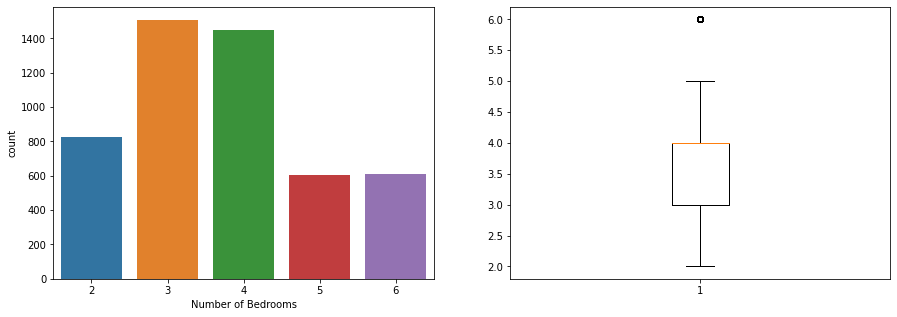

In [103]:
# Melihat distribusi dari Number of Bedrooms

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.countplot(df['Number of Bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['Number of Bedrooms'])
plt.show()

**Kesimpulan**

* Sebagian besar rumah memiliki jumlah kamar tidur siap pakai 3 dan 4
* Data memiliki outliers.

## Hubungan antara independent dan dependent variabel

<Figure size 720x576 with 0 Axes>

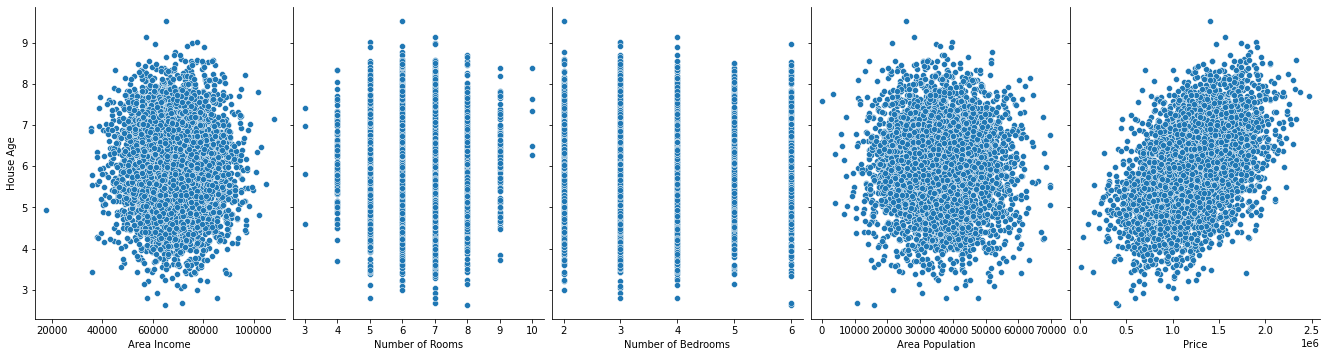

In [104]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=df.drop(['House Age', 'Address', 'longitude', 'latitude'], axis=1), y_vars=['House Age'], size=5, aspect=0.75)
plt.show()



---



---



# Modelling

In [105]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,longitude,latitude
0,79545.458574,5.682861,7,4,23086,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",-114.31,34.19
1,79248.642455,6.002900,6,3,40173,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",-114.47,34.40
2,61287.067179,5.865890,8,5,36882,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",-114.56,33.69
3,63345.240046,7.188236,5,3,34310,1.260617e+06,USS Barnett\nFPO AP 44820,-114.57,33.64
4,59982.197226,5.040555,7,4,26354,6.309435e+05,USNS Raymond\nFPO AE 09386,-114.57,33.57


In [106]:
# Buat variabel x dan y

X = df.drop(['House Age','Address','longitude', 'latitude'], axis=1)
y = df['House Age']
X.head()

,Area Income,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,7,4,23086,1.059034e+06
1,79248.642455,6,3,40173,1.505891e+06
2,61287.067179,8,5,36882,1.058988e+06
3,63345.240046,5,3,34310,1.260617e+06
4,59982.197226,7,4,26354,6.309435e+05


## Split Dataset

In [107]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


## Linear Regression

In [108]:
from sklearn.metrics import r2_score

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, lin_reg.predict(x_test))*100}')

R² score: 70.98483959977781


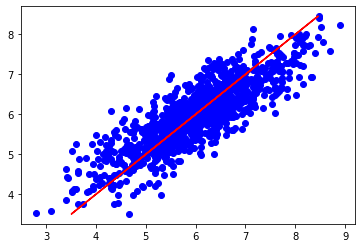

In [110]:
# Linear Regression Graph

plt.scatter(y_test,lin_reg.predict(x_test), color="b")
plt.plot(lin_reg.predict(x_test),lin_reg.predict(x_test), color="r")

## Polynomial Regression

In [111]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly_train,y_train)


print(f'R² score: {r2_score(y_test, lin_reg2.predict(x_poly_test))*100}')

R² score: 70.92354087593466


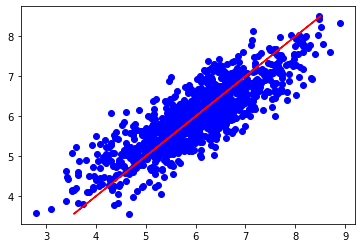

In [112]:
# Polynomial Regression Graph

plt.scatter(y_test,lin_reg2.predict(x_poly_test), color="b")
plt.plot(lin_reg2.predict(x_poly_test),lin_reg2.predict(x_poly_test), color="r")

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, r_dt.predict(x_test))*100}')

R² score: 29.815969220453155


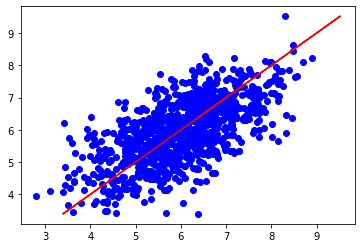

In [114]:
# Decision Tree - Regression Graph

plt.scatter(y_test,r_dt.predict(x_test), color="b")
plt.plot(r_dt.predict(x_test),r_dt.predict(x_test), color="r") 

## Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators = 100,random_state=0)
rf_reg.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, rf_reg.predict(x_test))*100}')

R² score: 60.56831241124354


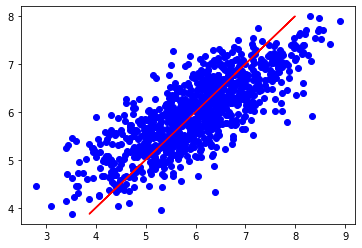

In [116]:
# Random Forest - Regression Graph

plt.scatter(y_test,rf_reg.predict(x_test), color="b")
plt.plot(rf_reg.predict(x_test),rf_reg.predict(x_test), color="r") 

## Improve Model AKurasi dengan GridSearchCV

### Import library xgboost dan transformasikan data dengan algoritma gridsearchcv

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


In [118]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [119]:
# setting parameter hyperparameter (dictionary)

search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [120]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4
                  )

In [121]:
GS.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-5.079) r2: (test=-24.579) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-5.076) r2: (test=-25.693) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.970) r2: (test=-24.318) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-5.043) r2: (test=-27.059) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-5.054) r2: (test=-24.750) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4.613) r2: (test=-20.100) total tim

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [122]:
print(GS.best_params_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [123]:
print(GS.best_score_)

0.6513536480082536


# Komparasi

In [124]:
def evaluate_model(model, x_test, y_test):

    from sklearn import metrics

    # Prediksi data uji 
    y_pred = model.predict(x_test)

    # Menghitung akurasi, presisi, recall, f1-score, dan kappa score
    acc = model.score(x_test,y_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  

    return {'acc': acc, 'mae': mae, 'mse': mse, 'rmse': rmse}

In [125]:
linear_eval = evaluate_model(lin_reg, x_test, y_test)
poly_eval = evaluate_model(lin_reg2, x_poly_test, y_test)
dt_eval = evaluate_model(r_dt, x_test, y_test)
rf_eval = evaluate_model(rf_reg, x_test, y_test)
xgboost_eval = evaluate_model(GS, x_test, y_test)


print('Accuracy:', linear_eval['acc'])
print('MAE:', linear_eval['mae'])
print('MSE:', linear_eval['mse'])
print('RMSE:', linear_eval['rmse'])

Accuracy: 0.7098483959977782
MAE: 0.43671123105579834
MSE: 0.29856887758593176
RMSE: 0.5464145656787818


In [126]:
keys = linear_eval.keys()
values = zip(linear_eval.values(), poly_eval.values(), dt_eval.values(), rf_eval.values(), xgboost_eval.values())
dictionary = dict(zip(keys, values))

print(dictionary)

{'acc': (0.7098483959977782, 0.7092354087593467, 0.29815969220453153, 0.6056831241124354, 0.6755886374738018), 'mae': (0.43671123105579834, 0.4378833682440277, 0.6781570856136532, 0.5060256749888651, 0.45993139776845327), 'mse': (0.29856887758593176, 0.2991996475324995, 0.7222006359870177, 0.40575597523162343, 0.33382250881793546), 'rmse': (0.5464145656787818, 0.5469914510597944, 0.8498238852768365, 0.636989776394899, 0.577773752275002)}


In [127]:
data = pd.DataFrame(dictionary, index=['Linear Regression','Polynomial Regression','Decision Tree','Random Forest','GridSearchCV'])
data

,acc,mae,mse,rmse
Linear Regression,0.709848,0.436711,0.298569,0.546415
Polynomial Regression,0.709235,0.437883,0.299200,0.546991
Decision Tree,0.298160,0.678157,0.722201,0.849824
Random Forest,0.605683,0.506026,0.405756,0.636990
GridSearchCV,0.675589,0.459931,0.333823,0.577774


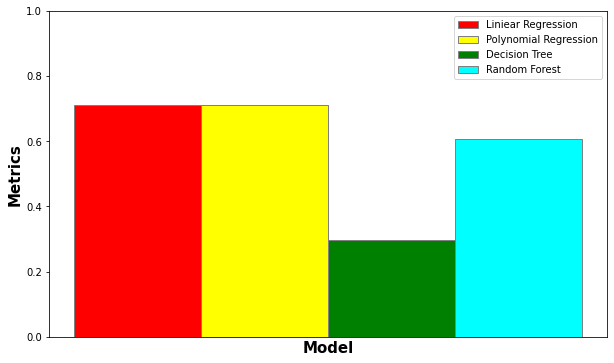

In [128]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(10, 6))


# set height of bar
linear_score = [linear_eval['acc']]
poly_score= [poly_eval['acc']]
dt_score = [dt_eval['acc']]
rf_score = [rf_eval['acc']]

#Set position of bar on X axis
br1 = np.arange(len(linear_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, linear_score, color ='red', width = barWidth ,
		edgecolor ='grey', label ='Liniear Regression')
plt.bar(br2, poly_score, color ='yellow', width =barWidth ,
		edgecolor ='grey', label ='Polynomial Regression')
plt.bar(br3, dt_score, color ='green', width =barWidth,
		edgecolor ='grey', label ='Decision Tree')
plt.bar(br4, rf_score, color ='cyan', width = barWidth,
		edgecolor ='grey', label ='Random Forest')


# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylim(0,1)
plt.xticks([])

plt.legend()
plt.show()


**Kesimpulan**

1. Model dengan akurasi terbaik adalah model dengan linear regression

# Deployment

In [129]:
import warnings
warnings.filterwarnings("ignore")

#Masukkan nilai (Area Income, Number of Rooms,	Number of Bedrooms,	Area Population, Price)
example = np.array([[70000, 7, 4.09 , 23086.800503, 1.059034e+06]]) # menggunakan baris pertama
age = lin_reg.predict((example))

print(f"Usia rumah yang tersedia {age[0]:.2f} Tahun ")

Usia rumah yang tersedia 5.72 Tahun 


# Simpan Model dengan Joblib

In [130]:
import joblib

In [131]:
joblib.dump((lin_reg), "model_predict_home_age.pkl")

['model_predict_home_age.pkl']

In [132]:
model = joblib.load('model_predict_home_age.pkl')
model

LinearRegression()

In [133]:
# testing (dalam tahun)

hasil = model.predict(example)
np.around(hasil,2)

array([5.72])